# Covid Cases in Ontario Public Schools

### QUESTION:
### Does High Enrolment correlate with Higher Number of Covid Cases in Ontario Schools?

### HYPOTHESIS
### High Enrolment correlates with Higher Number of Covid Cases in Ontario Schools

Dataset 1 - Ontario Schools Covid Data

The dataset is sourced from the Ontario Data website (https://data.ontario.ca/).  
In particular, I chose to study the Covid data for the 2020-2021 school year


Dataset 2 - Ontario Schools Enrolment 

I am also supplementing the first dataset with Ontario Public Schools Enrolment data for the 2019-2020 school year from the Open Canada Data website  (https://open.canada.ca/).  This school year was the latest enrolment data available online.  I think it’s safe to assume that the enrolment numbers are fairly consistent to 2020-2021 which is the year that the Covid data covers.

### Overview on Dataset 1 - Ontario Schools Covid Data

In [22]:
# calling on the pandas library
import pandas as pd

In [30]:
# asking pandas to ingest the Ontario Schools Covid Data csv file
covid_data = pd.read_csv("/Users/wazabifilms/Documents/Juno Data Analytics Course/Python/Python Project/Schools Covid 19 Data/schoolsactivecovid.csv")

In [31]:
# displaying the first 10 rows of the csv file as a dataframe
covid_data.head(10)

,collected_date,reported_date,school_board,school_id,school,municipality,confirmed_student_cases,confirmed_staff_cases,confirmed_unspecified_cases,total_confirmed_cases
0,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,753203,École élémentaire catholique Roger-Saint-Denis,Ottawa,0,1,NaN,1
1,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,793027,École élémentaire catholique Saint-François-d’...,Ottawa,1,0,NaN,1
2,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,860573,École élémentaire catholique Sainte-Anne,Ottawa,1,0,NaN,1
3,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,734314,École élémentaire catholique Laurier-Carrière,Ottawa,1,0,NaN,1
4,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,750107,École intermédiaire catholique Franco-Ouest,Ottawa,1,0,NaN,1
5,2020-09-10,2020-09-11,Conseil des écoles publiques de l’Est de l’Ont...,907430,École secondaire publique De La Salle,Ottawa,0,1,NaN,1
6,2020-09-10,2020-09-11,Conseil Scolaire Viamonde,310415,École Ronald-Marion,Pickering,0,1,NaN,1
7,2020-09-10,2020-09-11,Halton Catholic District School Board,821241,St. Marguerite d’Youville Catholic Elementary ...,Oakville,0,1,NaN,1
8,2020-09-10,2020-09-11,Halton District School Board,076727,Oodeenawi Public School,Oakville,0,1,NaN,1
9,2020-09-10,2020-09-11,Peel District School Board,0,North Field Office,Brampton,0,1,NaN,1


In [32]:
# displaying the number of rows and columns of dataframe
covid_data.shape

(70053, 10)

### Cleanup and Transformation on Dataset 1 - Ontario Schools Covid Data¶

There are 4 columns relating to covid case counts per school per day.  Cases are broken down by student case, staff case, unspecified case and total cases.  According to the metadata, (https://data.ontario.ca/dataset/summary-of-cases-in-schools), ‘unspecified case’ could mean student or staff - it is unspecified due to privacy considerations.

Our question is if higher enrolment correlates to higher covid cases.  So we will only take into account the column “total confirmed cases” since infections are infections regardless if they are students or staff.  And also because higher staff case counts speaks to the density of the school population.

Let us therefore remove the columns ‘student case,’ ‘staff case’ and ‘ unspecified case’

In [33]:
# removing 3 columns from dataframe
covid_data.drop(['confirmed_student_cases', 'confirmed_staff_cases', 'confirmed_unspecified_cases'], axis=1, inplace=True)

In [35]:
# checking to see if those 3 columns have gone away
covid_data.head(5)

,collected_date,reported_date,school_board,school_id,school,municipality,total_confirmed_cases
0,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,753203,École élémentaire catholique Roger-Saint-Denis,Ottawa,1
1,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,793027,École élémentaire catholique Saint-François-d’...,Ottawa,1
2,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,860573,École élémentaire catholique Sainte-Anne,Ottawa,1
3,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,734314,École élémentaire catholique Laurier-Carrière,Ottawa,1
4,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,750107,École intermédiaire catholique Franco-Ouest,Ottawa,1


As we can see from the rows - cases are reported by day.  We cannot really tell if each case per day is the same infected person.  However, we can deduce that schools are counting the same infected person on multiple days because the case counts stay consistent for each school for about 10 days straight.  We know from experience that covid infections take about 2 weeks to clear the human body.

So in order to answer our question - if higher enrolment correlates to higher covid cases - let us take into account only the *MAX* total case per school in one day.  This is the highest number of case counts in one day for each school in the 2020-2021 school year.  Meaning that if a school’s total case count was 1 on one day but 5 on another day, we will only take the 5 cases into account for that school because it is the max that they reported in one day for the school year.

In [38]:
# Grouping by 'school_id' and getting the max count of 'total_confirmed_cases' per school
# NB:  I added 'reset index' at the end of the code to make sure it doesn't use the school_id as the index when outputting this new dataframe
max_total_cases_by_school = covid_data.groupby('school_id')['total_confirmed_cases'].max().reset_index()

In [40]:
# checking to see what this new dataframe looks like now after this transformation
max_total_cases_by_school

,school_id,total_confirmed_cases
0,0,4
1,000000,1
2,000078,5
3,000469,2
4,000566,1
...,...,...
3237,B67172,1
3238,B67199,2
3239,B67300,1
3240,B67318,3


As we can now see, there are some school ids that look different from the rest: some nulls, some 0 and some that start with a B.  These don’t seem to be schools at all.  They are board sites or similar.  We might not need to get rid of them yet since they might be discarded when we join them to the enrolment dataset since these school ids will not have any enrolment numbers.

It's also important to note that we have discarded a lot of other columns in the original dataframe when we used the group by and max aggregations.  That's okay.  As much as I would like to take the reported dates and municipalities into account for this analysis, it will be too time-consuming since we only have a few days to do this project.  Afterall, Ontario has 444 municipalities. As for the dates, the max number of cases per school appears on more than one day, so it would require some intricate coding to pull those indexes.  I will attempt to do this after bootcamp.

For now, we are satisfied with our transformed dataset showing the max case count in one day per school_id.  We can use the school_id column as the key to merge our enrolment table.

Also - let's rename the last column since we did tranform it.  

In [51]:
#renaming the last column
MaxCases = max_total_cases_by_school.rename(columns={"total_confirmed_cases": "Highest_Covid_Cases_In_One_Day"})
MaxCases

,school_id,Highest_Covid_Cases_In_One_Day
0,0,4
1,000000,1
2,000078,5
3,000469,2
4,000566,1
...,...,...
3237,B67172,1
3238,B67199,2
3239,B67300,1
3240,B67318,3


### Analysis on Dataset 1 - Ontario Schools Covid Dataset 

Let’s generate some descriptive statistics for our transformed Ontario Schools Covid data.

In [52]:
# Generating descriptive statistics on last column
MaxCases['Highest_Covid_Cases_In_One_Day'].describe()

count    3242.000000
mean        2.694633
std         2.540489
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        48.000000
Name: Highest_Covid_Cases_In_One_Day, dtype: float64

We have an outlier!  Or at least one outlier that we can see from the max statistic.  A school has a count of 48 cases in one day while the mean is only 2.7 and the std is only 2.5.  Let’s see if that school with 48 cases in one day has high enrolment.

Let’s also check the median and mode for total confirmed cases:

In [53]:
MaxCases['Highest_Covid_Cases_In_One_Day'].median()

2.0

In [54]:
MaxCases['Highest_Covid_Cases_In_One_Day'].mode()

0    1
dtype: int64

The mode and median are also very low so I am getting more and more interested in this outlier with 48 cases in one day.  Which school is it?  How many students does it have?  Where is it located?

### Overview on Dataset 2 - Ontario Schools Enrolment

In [1]:
# calling on the pandas library
import pandas as pd

In [2]:
# asking pandas to ingest the Enrolment excel file
enrolment_info = pd.read_excel('/Users/wazabifilms/Documents/Juno Data Analytics Course/Python/Python Project/enrolment_by_school_1920_en_supp.xlsx')

In [3]:
# displaying a preview of the excel file as a dataframe
enrolment_info

,Board Number,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment
0,B28010,Algoma DSB,902344.0,Algoma Education Connection SS,Secondary,Public,English,210
1,B28010,Algoma DSB,19186.0,Anna McCrea PS,Elementary,Public,English,200
2,B28010,Algoma DSB,67679.0,Arthur Henderson PS,Elementary,Public,English,40
3,B28010,Algoma DSB,43362.0,Ben R McMullin PS,Elementary,Public,English,150
4,B28010,Algoma DSB,54542.0,Blind River PS,Elementary,Public,English,175
...,...,...,...,...,...,...,...,...
4839,B66095,York Region DSB,954292.0,Woodbridge College,Secondary,Public,English,515
4840,B66095,York Region DSB,617318.0,Woodbridge PS,Elementary,Public,English,490
4841,B66095,York Region DSB,618896.0,Woodland PS,Elementary,Public,English,260
4842,B66095,York Region DSB,624101.0,Yorkhill E S,Elementary,Public,English,405


In [4]:
# trying to find out if there are any missing values in the data
enrolment_info.isna().any()

Board Number        True
Board Name         False
School Number       True
School Name         True
School Level        True
School Type         True
School Language     True
Enrolment          False
dtype: bool

It looks like the missing values are in the last row.  The last row prints the total enrolment for all schools.  We can delete that row since we only want to analyze enrolment for each school.

### Cleanup and Transformation on Dataset 2 - Ontario Schools Enrolment 

In [6]:
# deleting the 'Total' row
enrolment_info.drop([4843], axis=0, inplace=True)

In [7]:
# trying to find out if the 'Total' row has been deleted successfully and if there are other missing values in the dataframe
enrolment_info.isna().any()

Board Number       False
Board Name         False
School Number      False
School Name        False
School Level       False
School Type        False
School Language    False
Enrolment          False
dtype: bool

Perfect!  There are no more missing values and we got rid of the 'Total' row

In [8]:
# Trying to find how many unique schools in the dataset
enrolment_info['School Number'].nunique()

4843

Great!  This tells us that each row represents one school.  Now let's see how many unique objects there are in the columns 'School Level', 'School Type', and 'School Language' and what the values are for each.

In [9]:
enrolment_info['School Level'].unique()

array(['English', 'French'], dtype=object)

In [10]:
enrolment_info['School Type'].unique()

array(['Public', 'Catholic', 'Protestant Separate'], dtype=object)

In [11]:
enrolment_info['School Language'].unique()

array(['English', 'French'], dtype=object)

Now let's sort the enrolment column to get an idea of the range of values.  But it looks like the 'Enrolment' column is a mix of numbers and strings.  

There is also a value of '<10' in the enrolment column.  That's problematic in more ways than one.  The biggest issue is that we need only numerics in this column and there is no way to find the actual enrolment numbers for each of those schools (at least not within our timeframe).  Let's see how many of these rows have less than 10 enrolment.  If it's not too many, we can probably discard them since they don't seem like regular schools anyway.

In [14]:
# Taking a look at the schools where enrolment is below 10
enrolment_info[enrolment_info['Enrolment'] == '<10']

,Board Number,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment
27,B28010,Algoma DSB,368490.0,Missarenda Consolidated PS,Elementary,Public,English,<10
265,B67172,CDSB of Eastern Ontario,745698.0,St. James Catholic Education Centre HS,Secondary,Catholic,English,<10
438,B28118,CS public du Grand Nord de l'Ontario,25977.0,École publique l'Escalade,Elementary,Public,French,<10
512,B29130,CSDC des Aurores boréales,740225.0,Notre-Dame-des-Écoles,Elementary,Catholic,French,<10
1111,B66060,Durham DSB,933156.0,DCE - Under 21 CI & VS,Secondary,Public,English,<10
1865,B28045,Keewatin-Patricia DSB,501484.0,Savant Lake PS,Elementary,Public,English,<10
1869,B28045,Keewatin-Patricia DSB,566489.0,Upsala PS,Elementary,Public,English,<10
1880,B28061,Lakehead DSB,118575.0,Bernier-Stokes E S,Elementary,Public,English,<10
2141,B67156,Niagara CDSB,862642.0,Pope Francis C Elem S,Elementary,Catholic,English,<10
2640,B66125,Peel DSB,506508.0,Peel Alternative - North Elementary,Elementary,Public,English,<10


Not too bad.  There are 21 schools with less than 10 enrolment out of 4843.  So let's discard them

In [15]:
# deleting the schools with enrolment less than 10
enrolment_info.drop(enrolment_info.index[enrolment_info['Enrolment'] == '<10'], inplace=True)

In [16]:
# Now let's see if it indeed removed 21 rows from the dataframe.
enrolment_info.shape

(4822, 8)

There are now 4822 rows when there was 4843 before.  So it removed those rows successfully

In [17]:
# checking to see if the 'Enrolment' dtype is now a numeric or still a string
enrolment_info.dtypes

Board Number        object
Board Name          object
School Number      float64
School Name         object
School Level        object
School Type         object
School Language     object
Enrolment           object
dtype: object

In [18]:
# Enrolment column is still a string so let's convert it to numeric and hopefully we don't find anymore non numeric values
enrolment_info['Enrolment'] = pd.to_numeric(enrolment_info['Enrolment'])

In [19]:
# Checking data types again
enrolment_info.dtypes

Board Number        object
Board Name          object
School Number      float64
School Name         object
School Level        object
School Type         object
School Language     object
Enrolment            int64
dtype: object

Yay it worked!  Enrolment data is now an int64.  Let's sort it to see what ranges we have

In [20]:
# Sorting by enrolment
enrolment_info.sort_values(by='Enrolment')

,Board Number,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment
550,B29106,CSDC des Grandes Rivières,819506.0,É C St-Louis (Virginiatown),Elementary,Catholic,French,10
738,B66311,CÉP de l'Est de l'Ontario,616160.0,ÉI Rivière-Rideau,Elementary,Public,French,10
36,B28010,Algoma DSB,677523.0,Rockhaven School forExceptional Children PS,Elementary,Public,English,10
450,B28100,CSD du Nord-Est de l'Ontario,966753.0,ÉS Passeport Jeunesse,Secondary,Public,French,15
740,B66311,CÉP de l'Est de l'Ontario,890139.0,ÉSP Barrhaven sud,Secondary,Public,French,15
...,...,...,...,...,...,...,...,...
3147,B66044,Thames Valley DSB,914908.0,H B Beal SS,Secondary,Public,English,2075
4328,B67148,Waterloo CDSB,832103.0,St Mary's HS,Secondary,Catholic,English,2090
1518,B66133,Halton DSB,953121.0,White Oaks HS,Secondary,Public,English,2135
1520,B67121,Hamilton-Wentworth CDSB,689750.0,Bishop Ryan Catholic SS,Secondary,Catholic,English,2165


There are also some schools that have really low enrolment - in the double digits only.  Also, it’s interesting to note that enrolment numbers only appear in 5’s.  Examples; 10, 15, 2075,  2245 etc, But let’s take all of them into account moving forward even if some numbers are low.  

### Analysis on Dataset 2 - Ontario Schools Enrolment
Let’s generate some descriptive statistics on Enrolment numbers:

In [55]:
# Generating descriptive statistics on Enrolment
enrolment_info['Enrolment'].describe()

count    4822.000000
mean      426.335545
std       308.564232
min        10.000000
25%       220.000000
50%       350.000000
75%       540.000000
max      2245.000000
Name: Enrolment, dtype: float64

We have a high standard deviation so we have a big range of enrolment numbers.

Let’s also check the median and mode for enrolment:

In [56]:
enrolment_info['Enrolment'].median()

350.0

In [57]:
enrolment_info['Enrolment'].mode()

0    240
dtype: int64

Is it fair to lump all the school levels (elementary and secondary) together when calculating the stats?

Let’s quickly visualize the size ratios of these school types and get their means and max of enrolment:

<AxesSubplot:xlabel='School Level'>

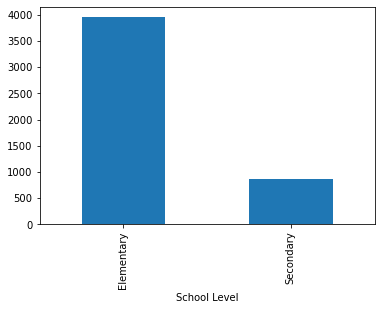

In [58]:
# Visualizing the number of Elementary and High Schools in the province
enrolment_info.groupby('School Level').size().plot(kind='bar')

In [60]:
# Grouping by School Level and outputting each of their mean enrolment
enrolment_info.groupby('School Level').mean()['Enrolment'].loc[['Elementary', 'Secondary']]

School Level
Elementary    360.541498
Secondary     725.206897
Name: Enrolment, dtype: float64

In [61]:
# Grouping by School Level and outputting each of their max enrolment
enrolment_info.groupby('School Level').max()['Enrolment'].loc[['Elementary', 'Secondary']]

School Level
Elementary    1400
Secondary     2245
Name: Enrolment, dtype: int64

There are 4 times more elementary schools than high schools in Ontario but average high school enrolment is double the elementary average enrolment.  Max enrolment is also double for high schools than elementary.  

<AxesSubplot:xlabel='School Type'>

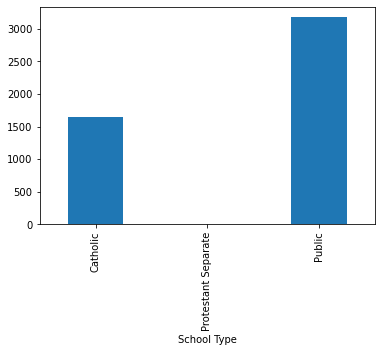

In [62]:
# Visualizing the number of Public and Catholic Schools in the province
enrolment_info.groupby('School Type').size().plot(kind='bar')

In [63]:
# Grouping by Public and Catholic and outputting each of their mean enrolment
enrolment_info.groupby('School Type').mean()['Enrolment'].loc[['Catholic', 'Public', 'Protestant Separate']]

School Type
Catholic               397.384428
Public                 441.334592
Protestant Separate    370.000000
Name: Enrolment, dtype: float64

In [64]:
# Grouping by Public and Catholic and outputting each of their max enrolment
enrolment_info.groupby('School Type').max()['Enrolment'].loc[['Catholic', 'Public', 'Protestant Separate']]

School Type
Catholic               2245
Public                 2135
Protestant Separate     370
Name: Enrolment, dtype: int64

Although there are twice as many public schools as Catholic, their enrolment number statistics are fairly similar.  As for the Protestant Separate school - there seems to be only one in the province so we can disregard this.

<AxesSubplot:xlabel='School Language'>

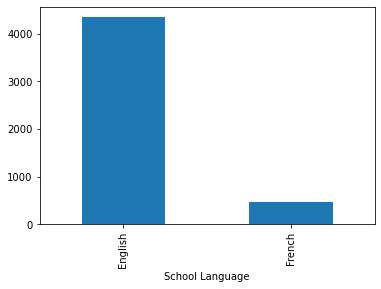

In [65]:
# Visualizing the number of English and French Schools in the province
enrolment_info.groupby('School Language').size().plot(kind='bar')

In [66]:
# Grouping by English and French and outputting each of their mean enrolment
enrolment_info.groupby('School Language').mean()['Enrolment'].loc[['English', 'French']]

School Language
English    447.014960
French     237.966457
Name: Enrolment, dtype: float64

In [67]:
# Grouping by English and French and outputting each of their max enrolment
enrolment_info.groupby('School Language').max()['Enrolment'].loc[['English', 'French']]

School Language
English    2245
French      985
Name: Enrolment, dtype: int64

There are definitely way more English schools than French in Ontario. And French school enrolments is about half of English schools.

Let’s see if these distinctions make a difference in answering our question.

### Answering the Question: 
Let’s finally merge our transformed enrolment data with our transformed covid cases in schools data using school_id and school number as keys.  

My first attempt was a left join but discovered that an inner join is better.

An inner join includes only schools that reported covid cases (some schools had no covid cases but were included in the enrolment data) and schools that are actually schools (not board office sites, which are included in the covid data).  A left join would have included schools with null values on ‘total_confirmed_cases.’  It would have worked but I would have to drop those values afterwards.  An inner join does this automatically.

Merging these tables appends the correct enrolment data to each specific school that reported at least 1 covid case in the 2020-2021 year.  This will also put the max case counts per school in the same table so that we can visualize our answer to the question.

However, one of the keys is a float and the other is an object.  I will have to cast the object to a numeric

In [69]:
enrolment_info.dtypes

Board Number        object
Board Name          object
School Number      float64
School Name         object
School Level        object
School Type         object
School Language     object
Enrolment            int64
dtype: object

In [70]:
MaxCases.dtypes

school_id                         object
Highest_Covid_Cases_In_One_Day     int64
dtype: object

I now also have to deal with the school_ids that start with B.  I thought they would be discarded with this merge but I need to get rid of them first so I can cast the column to numeric before I can use the column as a key.  Remember - these are not schools but board offices.  So let's get rid of them.

In [73]:
# creating a dataframe that does not have rows in 'school_id' with values starting with B
MaxCasesFinal = MaxCases[~MaxCases.school_id.str.startswith('B')]

In [74]:
# Checking to see if we got rid of the rows that start with B on school_id
MaxCasesFinal

,school_id,Highest_Covid_Cases_In_One_Day
0,0,4
1,000000,1
2,000078,5
3,000469,2
4,000566,1
...,...,...
3206,997579,1
3207,997587,2
3208,997625,1
3209,997676,2


In [79]:
# Casting 'school_id' to numeric so we can enable it as the key in our merge
pd.to_numeric(MaxCasesFinal['school_id'])

0            0
1            0
2           78
3          469
4          566
         ...  
3206    997579
3207    997587
3208    997625
3209    997676
3210    999920
Name: school_id, Length: 3211, dtype: int64

In [80]:
# Checking if this changed the dtype for that column
MaxCasesFinal.dtypes

school_id                         int64
Highest_Covid_Cases_In_One_Day    int64
dtype: object

In [81]:
# Merging the 2 transformed datasets
MergedData = pd.merge(enrolment_info, MaxCasesFinal, left_on = 'School Number', right_on = 'school_id', how = 'inner')

In [82]:
MergedData

,Board Number,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment,school_id,Highest_Covid_Cases_In_One_Day
0,B28010,Algoma DSB,54542.0,Blind River PS,Elementary,Public,English,175,54542,2
1,B28010,Algoma DSB,891347.0,Central Algoma SS,Secondary,Public,English,340,891347,3
2,B28010,Algoma DSB,202614.0,Francis H Clergue PS,Elementary,Public,English,550,202614,1
3,B28010,Algoma DSB,920533.0,Korah C & VS,Secondary,Public,English,865,920533,1
4,B28010,Algoma DSB,468339.0,R M Moore PS,Elementary,Public,English,270,468339,1
...,...,...,...,...,...,...,...,...,...,...
3161,B66095,York Region DSB,549380.0,Wismer PS,Elementary,Public,English,665,549380,1
3162,B66095,York Region DSB,954292.0,Woodbridge College,Secondary,Public,English,515,954292,27
3163,B66095,York Region DSB,617318.0,Woodbridge PS,Elementary,Public,English,490,617318,4
3164,B66095,York Region DSB,618896.0,Woodland PS,Elementary,Public,English,260,618896,3


In [83]:
# Checking to see if there are any missing values in this MergedData
MergedData.isna().any()

Board Number                      False
Board Name                        False
School Number                     False
School Name                       False
School Level                      False
School Type                       False
School Language                   False
Enrolment                         False
school_id                         False
Highest_Covid_Cases_In_One_Day    False
dtype: bool

No missing values.  So we're good to go.

Let’s call on seaborn for some visualizations to answer the question:

## Does High Enrolment correlate with Higher Number of Covid Cases in Ontario Schools?

In [87]:
# Importing Seaborn and matplotlib libraries so we can create graphs
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Highest_Covid_Cases_In_One_Day per School')

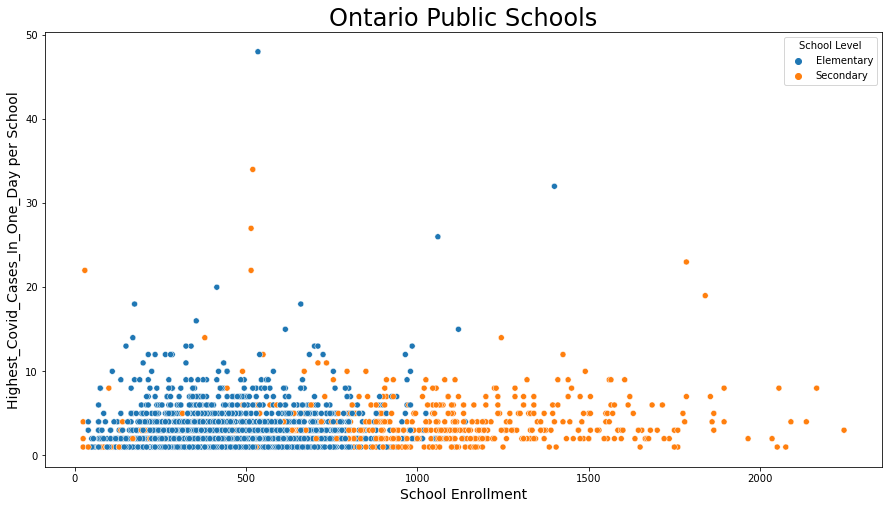

In [151]:
# Creating a graph with figure size specified
plt.figure(figsize=(15,8))
# Asking seaborn to create a scatterplot with axis and hues specific to our desired columns.  
# And then naming that scatterplot as 'p'
p = sns.scatterplot(data=MergedData, x='Enrolment', y='Highest_Covid_Cases_In_One_Day', hue='School Level')

# setting the labels, title and font sizes that appear in the scatterplot
p.set_title("Ontario Public Schools", fontsize = 24)
p.set_xlabel("School Enrollment", fontsize = 14)
p.set_ylabel("Highest_Covid_Cases_In_One_Day per School", fontsize = 14)

## ANSWER: 
### The scatterplot above shows that there is no correlation between high enrolment and high covid case counts in Ontario Schools

<Figure size 1080x576 with 0 Axes>

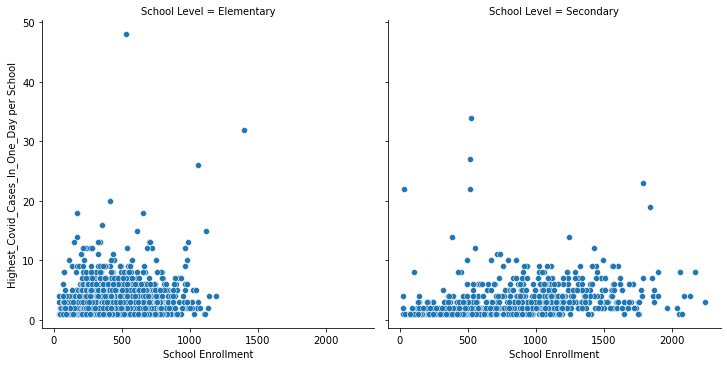

In [154]:
# Creating a graph with figure size specified
plt.figure(figsize=(15,8))
# Asking seaborn to create a relational plot comparing Elementary and Secondary as 2 separate graphs with the same x and y columns
# And then naming the relational plot as 'rp'
rp = sns.relplot(data=MergedData, x='Enrolment', y='Highest_Covid_Cases_In_One_Day', col='School Level', kind='scatter')

# setting the labels and title
rp.set_xlabels("School Enrollment")
rp.set_ylabels("Highest_Covid_Cases_In_One_Day per School")

### There is no correlation between high enrolment and high covid case counts, not even if you break it down by elementary and secondary schools as visualized by the relational plot above

These graphs show that most schools that had Covid cases had under 10 max cases in one day, regardless of their enrolment size.

The elementary school with the highest enrolment in the province reported only the 2nd highest case count in one day in an elementary school (3rd highest overall if you also take high schools into account).  And the school with the highest enrolment overall only had 3 cases as their max in one day.

Meanwhile, extremely high case counts in one day (outliers) are in schools with low, average and high enrolment numbers (the full range).  

### The Outliers - Investigating Further

These graphs show outliers very clearly.  Let's see which schools these are

In [95]:
# Dropping the column 'Board Number' since the column "Board Name" gives us this information in a better way
MergedData.drop(MergedData.columns[0], axis=1, inplace=True)

In [96]:
# Pulling up the top 10 schools with the highest covid cases in one day
MergedData.sort_values(by='Highest_Covid_Cases_In_One_Day', ascending=False).head(10)

,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment,school_id,Highest_Covid_Cases_In_One_Day
719,Greater Essex County DSB,203009.0,Frank W Begley PS,Elementary,Public,English,535,203009,48
2565,Toronto DSB,949027.0,Ursula Franklin Academy,Secondary,Public,English,520,949027,34
2558,Toronto DSB,552704.0,Thorncliffe Park PS,Elementary,Public,English,1400,552704,32
3162,York Region DSB,954292.0,Woodbridge College,Secondary,Public,English,515,954292,27
2163,Toronto DSB,56367.0,Bowmore Road Jr & Sr PS,Elementary,Public,English,1060,56367,26
2424,Toronto DSB,933198.0,Marc Garneau CI,Secondary,Public,English,1785,933198,23
1127,Lambton Kent DSB,910228.0,North Lambton SS,Secondary,Public,English,515,910228,22
2122,Toronto DSB,901908.0,ALPHA II Alternative S,Secondary,Public,English,30,901908,22
2205,Toronto DSB,107190.0,Church Street Jr PS,Elementary,Public,English,415,107190,20
620,Durham DSB,935310.0,Pickering HS,Secondary,Public,English,1840,935310,19


The sorted dataframe above showing which schools have the highest case counts in one day can also be annotated in the original scatterplot.  This visualization has more impact than the dataframe.  See below:

Text(1855, 19, 'Pickering HS (Durham DSB)')

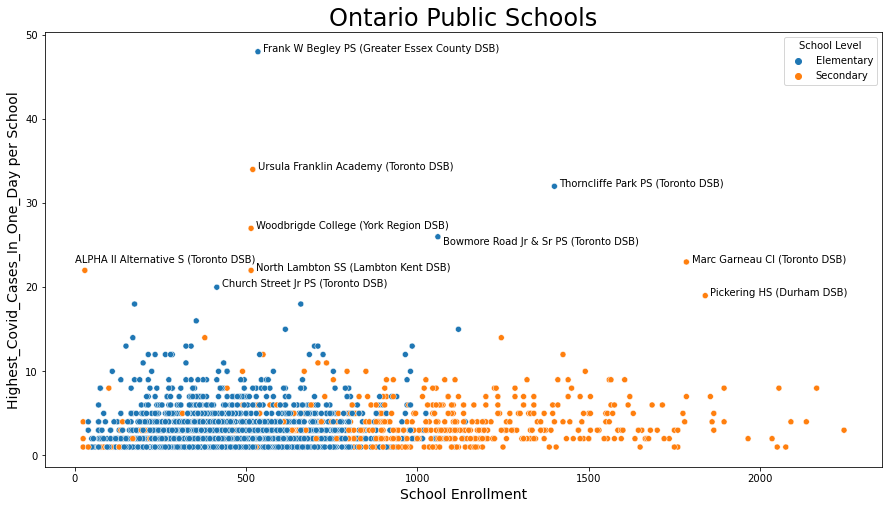

In [153]:
# Creating a graph with figure size specified
plt.figure(figsize=(15,8))
# Asking seaborn to create a scatterplot with axis and hues specific to our desired columns.  
# And then naming that scatterplot as 'p'
p = sns.scatterplot(data=MergedData, x='Enrolment', y='Highest_Covid_Cases_In_One_Day', hue='School Level')

# setting the labels, title and font sizes that appear in the scatterplot
p.set_title("Ontario Public Schools", fontsize = 24)
p.set_xlabel("School Enrollment", fontsize = 14)
p.set_ylabel("Highest_Covid_Cases_In_One_Day per School", fontsize = 14)

# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
'Frank W Begley PS (Greater Essex County DSB)', xy=(535, 48), xytext=(550, 48))
plt.annotate('Ursula Franklin Academy (Toronto DSB)', xy=(520, 34), xytext=(535, 34))
plt.annotate('Thorncliffe Park PS (Toronto DSB)', xy=(1400, 32), xytext=(1415, 32))
plt.annotate('Woodbrigde College (York Region DSB)', xy=(515, 27), xytext=(530, 27))
plt.annotate('Bowmore Road Jr & Sr PS (Toronto DSB)', xy=(1060, 26), xytext=(1075,25))
plt.annotate('Marc Garneau CI (Toronto DSB)', xy=(1785, 23), xytext=(1800,23))
plt.annotate('North Lambton SS (Lambton Kent DSB)', xy=(515, 22), xytext=(530,22))
plt.annotate('ALPHA II Alternative S (Toronto DSB)', xy=(30, 22), xytext=(0,23))
plt.annotate('Church Street Jr PS (Toronto DSB)', xy=(415, 20), xytext=(430,20))
plt.annotate('Pickering HS (Durham DSB)', xy=(1840, 19), xytext=(1855,19))

The outliers are a mix of elementary and secondary schools and are from different school boards (although the Toronto District School Board appears 6 times in the top 10.  But that’s because the Toronto District School Board has the most number of schools in the province).

I am still curious about the biggest outlier - Frank W Begley PS, which had 48 cases in one day.  Looking at this school in google maps, it is in Windsor, directly across the river from Detroit.  You can swim it.   This makes me wonder if frequent cross border travel to the US which had surging numbers early in the pandemic, leads to higher risk of infection.

However, from the graph, none of the other schools in the same school board even show up in the top 10.  So there is clearly something more in play here than just enrollment numbers and geographical location of the school.

### Regression Model
Let’s see if this model will yield any sort of result, simply because I can.  However, after proving my hypothesis wrong already, I know that a Regression model is probably not going to be any good here.  

In [99]:
# Importing the numpy and statsmodels libraries to create a linear regression model
import numpy as np
import statsmodels.api as sm

# Creating a column of 1's in our dataframe to act as a constant.  We will name this column 'intercept'
MergedData['intercept'] = np.ones((MergedData.shape[0],))

In [101]:
# Checking to see if the 'intercept' column has been added
MergedData.head(2)

,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment,school_id,Highest_Covid_Cases_In_One_Day,intercept
0,Algoma DSB,54542.0,Blind River PS,Elementary,Public,English,175,54542,2,1.0
1,Algoma DSB,891347.0,Central Algoma SS,Secondary,Public,English,340,891347,3,1.0


I need to separate my dependent variable column ('Highest_Covid_Cases_In_One_Day') from my independent variable columns ('School Level', 'School Type', 'School Language', 'Enrolment', 'Intercept').  

In [109]:
# Re-ordering my columns
MergedDataReordered = MergedData[['Highest_Covid_Cases_In_One_Day', 'intercept', 'Board Name', 'School Number', 'School Name', 'School Level', 'School Type', 'School Language', 'Enrolment', 'school_id']]

In [111]:
# Checking to see if the Re-ordering worked
MergedDataReordered.head(2)

,Highest_Covid_Cases_In_One_Day,intercept,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment,school_id
0,2,1.0,Algoma DSB,54542.0,Blind River PS,Elementary,Public,English,175,54542
1,3,1.0,Algoma DSB,891347.0,Central Algoma SS,Secondary,Public,English,340,891347


In [133]:
# Creating my variables by index location of columns
dependent_vars = MergedDataReordered.iloc[:, 0]
independent_vars = MergedDataReordered.iloc[:, 1:]

In [134]:
# Checking to see if my dependent_vars only includes the column 'Highest_Covid_Cases_In_One_Day'
dependent_vars

0        2
1        3
2        1
3        1
4        1
        ..
3161     1
3162    27
3163     4
3164     3
3165     1
Name: Highest_Covid_Cases_In_One_Day, Length: 3166, dtype: int64

In [135]:
# Checking to see if my independent_vars only includes the rest of the columns
independent_vars

,intercept,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment,school_id
0,1.0,Algoma DSB,54542.0,Blind River PS,Elementary,Public,English,175,54542
1,1.0,Algoma DSB,891347.0,Central Algoma SS,Secondary,Public,English,340,891347
2,1.0,Algoma DSB,202614.0,Francis H Clergue PS,Elementary,Public,English,550,202614
3,1.0,Algoma DSB,920533.0,Korah C & VS,Secondary,Public,English,865,920533
4,1.0,Algoma DSB,468339.0,R M Moore PS,Elementary,Public,English,270,468339
...,...,...,...,...,...,...,...,...,...
3161,1.0,York Region DSB,549380.0,Wismer PS,Elementary,Public,English,665,549380
3162,1.0,York Region DSB,954292.0,Woodbridge College,Secondary,Public,English,515,954292
3163,1.0,York Region DSB,617318.0,Woodbridge PS,Elementary,Public,English,490,617318
3164,1.0,York Region DSB,618896.0,Woodland PS,Elementary,Public,English,260,618896


In [116]:
# One hot encoding the 'School Level' column so that it appears as digits instead of categories
# I am doing this because Regression Modelling only works with numerics
School_Level_encoded = pd.get_dummies(independent_vars['School Level'])

In [117]:
# Checking to see if the encoding worked
School_Level_encoded

,Elementary,Secondary
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
3161,1,0
3162,0,1
3163,1,0
3164,1,0


In [118]:
# One hot encoding the 'School Type' column so that it appears as digits instead of categories
School_Type_encoded = pd.get_dummies(independent_vars['School Type'])

In [119]:
# Checking to see if the encoding worked
School_Type_encoded

,Catholic,Public
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3161,0,1
3162,0,1
3163,0,1
3164,0,1


In [120]:
# One hot encoding the 'School Language' column so that it appears as digits instead of categories
School_Language_encoded = pd.get_dummies(independent_vars['School Language'])

In [121]:
# Checking to see if the encoding worked
School_Language_encoded

,English,French
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3161,1,0
3162,1,0
3163,1,0
3164,1,0


In [136]:
# concatenating School_Level_encoded to independent_vars
independent_vars = pd.concat([independent_vars, School_Level_encoded], axis=1)

In [137]:
# concatenating School_Type_encoded to independent_vars
independent_vars = pd.concat([independent_vars, School_Type_encoded], axis=1)

In [138]:
# concatenating School_Language_encoded to independent_vars
independent_vars = pd.concat([independent_vars, School_Language_encoded], axis=1)

In [139]:
# Checking to see if it concatenating 3 encoding lists
independent_vars.head(2) 

,intercept,Board Name,School Number,School Name,School Level,School Type,School Language,Enrolment,school_id,Elementary,Secondary,Catholic,Public,English,French
0,1.0,Algoma DSB,54542.0,Blind River PS,Elementary,Public,English,175,54542,1,0,0,1,1,0
1,1.0,Algoma DSB,891347.0,Central Algoma SS,Secondary,Public,English,340,891347,0,1,0,1,1,0


In [140]:
# dropping unnecessary columns for my regression model
independent_vars.drop(columns=['Board Name', 'School Number', 'School Name', 'School Level', 'School Type', 'School Language', 'school_id'], inplace=True)

In [141]:
# Checking to see if it dropped the unnecessary columns
independent_vars.head(2) 

,intercept,Enrolment,Elementary,Secondary,Catholic,Public,English,French
0,1.0,175,1,0,0,1,1,0
1,1.0,340,0,1,0,1,1,0


In [142]:
lin_reg = sm.OLS(dependent_vars, independent_vars) #creating the model
reg_results = lin_reg.fit() # running the model
print(reg_results.summary()) # results of the model

                                  OLS Regression Results                                  
Dep. Variable:     Highest_Covid_Cases_In_One_Day   R-squared:                       0.059
Model:                                        OLS   Adj. R-squared:                  0.058
Method:                             Least Squares   F-statistic:                     49.85
Date:                            Tue, 30 Nov 2021   Prob (F-statistic):           9.72e-41
Time:                                    00:03:25   Log-Likelihood:                -7359.4
No. Observations:                            3166   AIC:                         1.473e+04
Df Residuals:                                3161   BIC:                         1.476e+04
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

The R-squared is 0.059.  Adj. R-squared is 0.058.  It is insignificant because it is very far from 1.  No need to even look at the p values and coefficients.

What if I drop all the independent variables except for 'Enrolment'?  I know this is over-fitting but let's see what happens

In [145]:
# dropping all the columns except 'enrolment' from independent vars
independent_vars2 = independent_vars.drop(columns=['Elementary', 'Secondary', 'Catholic', 'Public', 'English', 'French'])
#creating the model
lin_reg2 = sm.OLS(dependent_vars, independent_vars2)
# running the model
regression_results2 = lin_reg2.fit()
# results of the model
print(regression_results2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Highest_Covid_Cases_In_One_Day   R-squared:                       0.055
Model:                                        OLS   Adj. R-squared:                  0.055
Method:                             Least Squares   F-statistic:                     184.7
Date:                            Tue, 30 Nov 2021   Prob (F-statistic):           6.37e-41
Time:                                    00:12:36   Log-Likelihood:                -7366.5
No. Observations:                            3166   AIC:                         1.474e+04
Df Residuals:                                3164   BIC:                         1.475e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

The R-squared and Adj. R-squared are even worse with only 'enrolment' as the independent variable.  This model does not work.

### Recommendation and Notes
This dataset is from a time before most of the Ontario population was vaccinated against Covid.  Vaccines aside, we should take a multi-faceted approach to battling the spread of this disease.

Our analysis shows that just because a student or staff member is in a school with high enrolment doesn’t necessarily mean they have a higher chance of getting Covid-19.  Other factors come into play like masking, hand washing, ventilation systems, types of households students and staff belong to and other social behaviour etc.  

I do not recommend shrinking class sizes or school sizes as the one and only solution to protecting students and school staff against covid.  We should use a multi-faceted approach. 

Last but not least, our method of using the Max Covid case counts in one day per school might not be the best measure of comparison.  The study may have been different if we looked at total cases per school for the whole school year, not just each school's highest case count in one day.  It just speaks to the limitation of our dataset since cases were reported by day and it is unclear if each count was of a new infected person or the same person  with the same infection day after day.  It might be worth finding data for total cases per school and comparing it with this study.